In [ ]:
!pip install numpy matplotlib scikit-learn


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Sample data: Years of experience (X) and salary (Y)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Reshaping into 2D array for sklearn
y = np.array([30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000])
print(X)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


In [6]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate the R² score
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


In [ ]:
# Plot the training data
plt.scatter(X_train, y_train, color='blue', label='Training data')

# Plot the regression line
plt.plot(X_train, model.predict(X_train), color='red', label='Regression line')

# Plot the test data
plt.scatter(X_test, y_test, color='green', label='Test data')

plt.title('Simple Linear Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Train MSE: 0.8477
Test MSE: 0.6537


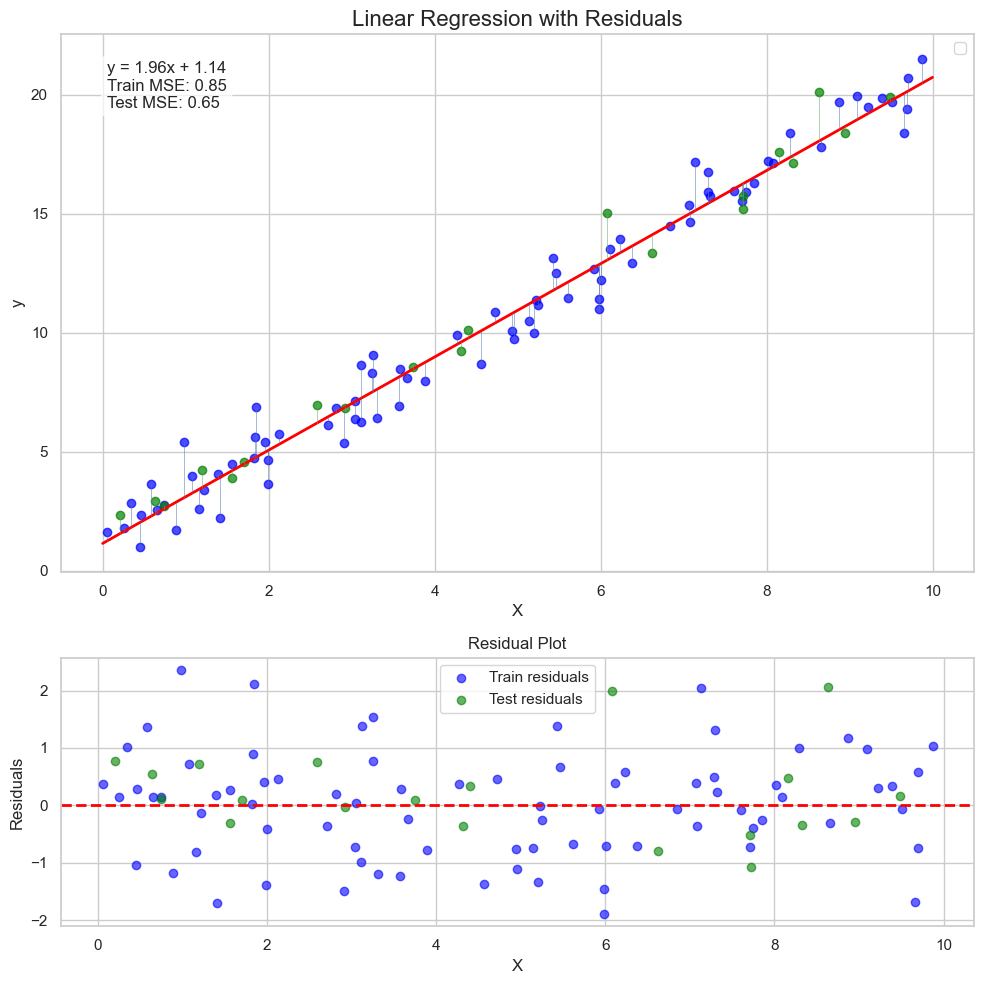

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Generate dummy data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + 1 * np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict values
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
X_range = np.linspace(0, 10, 100).reshape(-1, 1)
y_range_pred = model.predict(X_range)

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
equation = f"y = {model.coef_[0][0]:.2f}x + {model.intercept_[0]:.2f}"
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")


# Set Seaborn style
sns.set(style='whitegrid')

# Create plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1]})

# Plot 1: Regression line with training and testing points
ax1.scatter(X_train, y_train, color='blue', alpha=0.7)
ax1.scatter(X_test, y_test, color='green',alpha=0.7)
ax1.plot(X_range, y_range_pred, color='red', linewidth=2)

# Labels and annotations
ax1.set_title('Linear Regression with Residuals', fontsize=16)
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.legend()
ax1.text(
    0.05, 0.95,
    f"{equation}\nTrain MSE: {train_mse:.2f}\nTest MSE: {test_mse:.2f}",
    transform=ax1.transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.7)
)

# Show residual lines for training and testing points
for i in range(len(X_train)):
    ax1.plot([X_train[i], X_train[i]], [y_train[i], y_train_pred[i]], 'b-', linewidth=0.7, alpha=0.5)
for i in range(len(X_test)):
    ax1.plot([X_test[i], X_test[i]], [y_test[i], y_test_pred[i]], 'g-', linewidth=0.7, alpha=0.5)

# Plot 2: Residual plot
ax2.scatter(X_train, train_residuals, color='blue', alpha=0.6, label='Train residuals')
ax2.scatter(X_test, test_residuals, color='green', alpha=0.6, label='Test residuals')
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax2.set_xlabel('X')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot')
ax2.legend()

# Final layout
plt.tight_layout()
plt.show()
